In [1]:
import pandas as pd
import geopandas as gpd
import contextily as ctx
import matplotlib.pyplot as plt

In [2]:
pip install -U kaleido

Note: you may need to restart the kernel to use updated packages.


In [3]:
from matplotlib.backends.backend_pdf import PdfPages

In [4]:
data = gpd.read_file('data/TOC 10 15 2021 SP4 TOC DIST.csv')
geojson = gpd.read_file('data/TOC Geocode Shapefile 10 21 2021.json')
bubbles = gpd.read_file('data/TOC_repro.geojson')

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 4 entries, 0 to 3
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   TIER      4 non-null      int64   
 1   geometry  4 non-null      geometry
dtypes: geometry(1), int64(1)
memory usage: 192.0 bytes


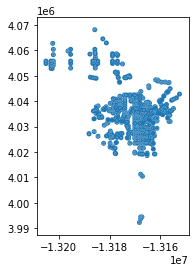

In [5]:
bubbles.plot()
bubbles.info()

In [6]:
bubbles['TIER'] = bubbles['TIER'].apply(str)
bubbles.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 4 entries, 0 to 3
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   TIER      4 non-null      object  
 1   geometry  4 non-null      geometry
dtypes: geometry(1), object(1)
memory usage: 192.0+ bytes


In [7]:
toc = geojson.merge(data,on='AIN')

In [8]:
from geopandas import GeoDataFrame
tocgdf = GeoDataFrame(toc)
type(tocgdf)

geopandas.geodataframe.GeoDataFrame

In [9]:
tocgdf = tocgdf.rename(columns={'geometry_x': 'geometry'})

In [10]:
toc_web_mercator = tocgdf.to_crs(epsg=3857)

In [11]:
toc_web_mercator.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
Int64Index: 352 entries, 0 to 351
Data columns (total 34 columns):
 #   Column                                       Non-Null Count  Dtype   
---  ------                                       --------------  -----   
 0   fid                                          352 non-null    int64   
 1   AIN                                          352 non-null    object  
 2   SitusAddre                                   352 non-null    object  
 3   geometry                                     352 non-null    geometry
 4   TOC Status                                   352 non-null    object  
 5   confirmTOC                                   352 non-null    object  
 6   notes                                        352 non-null    object  
 7   include                                      352 non-null    object  
 8   Address                                      352 non-null    object  
 9   cp_casenum                                   352 non-null

In [12]:
toc_web_mercator['total_units'] = toc_web_mercator['total_units'].astype(float)
toc_web_mercator.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
Int64Index: 352 entries, 0 to 351
Data columns (total 34 columns):
 #   Column                                       Non-Null Count  Dtype   
---  ------                                       --------------  -----   
 0   fid                                          352 non-null    int64   
 1   AIN                                          352 non-null    object  
 2   SitusAddre                                   352 non-null    object  
 3   geometry                                     352 non-null    geometry
 4   TOC Status                                   352 non-null    object  
 5   confirmTOC                                   352 non-null    object  
 6   notes                                        352 non-null    object  
 7   include                                      352 non-null    object  
 8   Address                                      352 non-null    object  
 9   cp_casenum                                   352 non-null

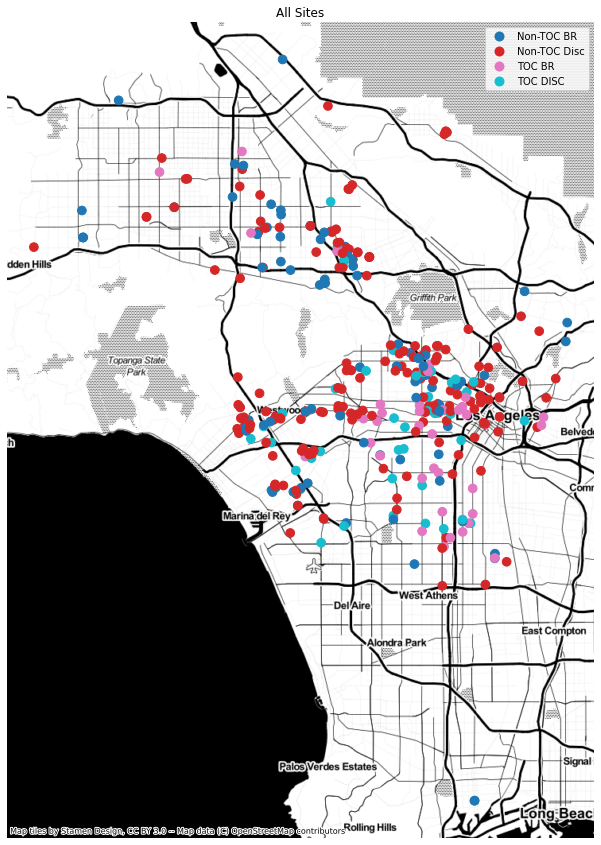

In [13]:
fig, ax = plt.subplots(figsize=(30, 15))
toc_web_mercator.plot(ax=ax,
                      column = 'TOC Status',
                      categorical = True,
                      legend = True,
                      markersize=75)

ax.axis('off')
ax.set_title('All Sites')

ctx.add_basemap(ax, source=ctx.providers.Stamen.Toner)

In [14]:
>>> print(plt.style.available)

['Solarize_Light2', '_classic_test_patch', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn', 'seaborn-bright', 'seaborn-colorblind', 'seaborn-dark', 'seaborn-dark-palette', 'seaborn-darkgrid', 'seaborn-deep', 'seaborn-muted', 'seaborn-notebook', 'seaborn-paper', 'seaborn-pastel', 'seaborn-poster', 'seaborn-talk', 'seaborn-ticks', 'seaborn-white', 'seaborn-whitegrid', 'tableau-colorblind10']


(-13205158.202511357,
 -13153799.220137483,
 3995146.526416354,
 4073594.7371256393)

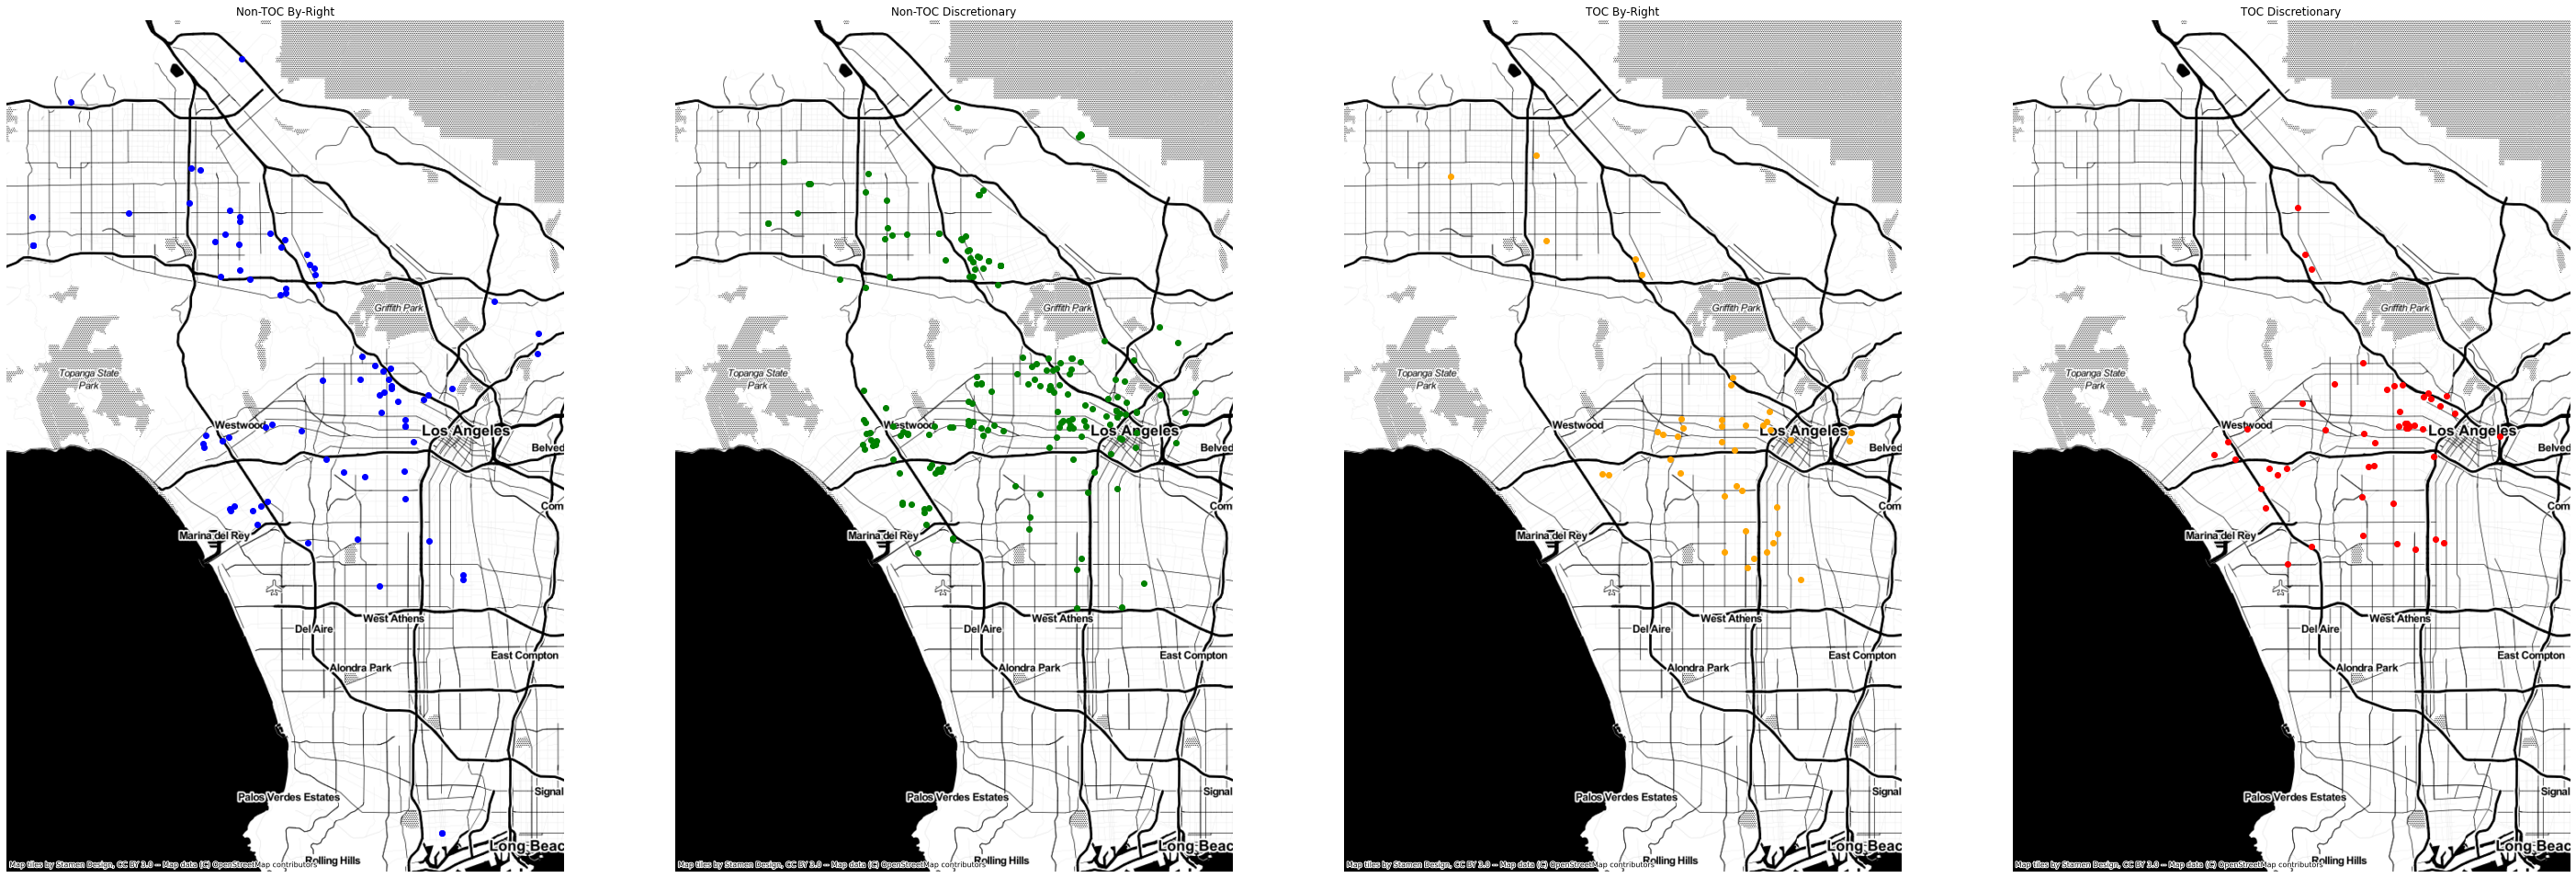

In [15]:
fix, axs = plt.subplots(1,4,sharex=True, sharey=True,figsize=(50,30))
ax1, ax2, ax3, ax4 = axs
toc_web_mercator[toc_web_mercator['TOC Status'] == 'Non-TOC BR'].plot(ax=ax1,color="blue")
ax1.set_title("Non-TOC By-Right")
ctx.add_basemap(ax1, source=ctx.providers.Stamen.Toner)
ax1.axis("off")

toc_web_mercator[toc_web_mercator['TOC Status'] == 'Non-TOC Disc'].plot(ax=ax2,color="green")
ax2.set_title("Non-TOC Discretionary")
ctx.add_basemap(ax2, source=ctx.providers.Stamen.Toner)
ax2.axis("off")

toc_web_mercator[toc_web_mercator['TOC Status'] == 'TOC BR'].plot(ax=ax3,color="orange")
ax3.set_title("TOC By-Right")
ctx.add_basemap(ax3, source=ctx.providers.Stamen.Toner)
ax3.axis("off")

toc_web_mercator[toc_web_mercator['TOC Status'] == 'TOC DISC'].plot(ax=ax4,color="red")
ax4.set_title("TOC Discretionary")
ctx.add_basemap(ax4, source=ctx.providers.Stamen.Toner)
ax4.axis("off")


(-13205158.202511357,
 -13153799.220137483,
 3995146.526416354,
 4073594.7371256393)

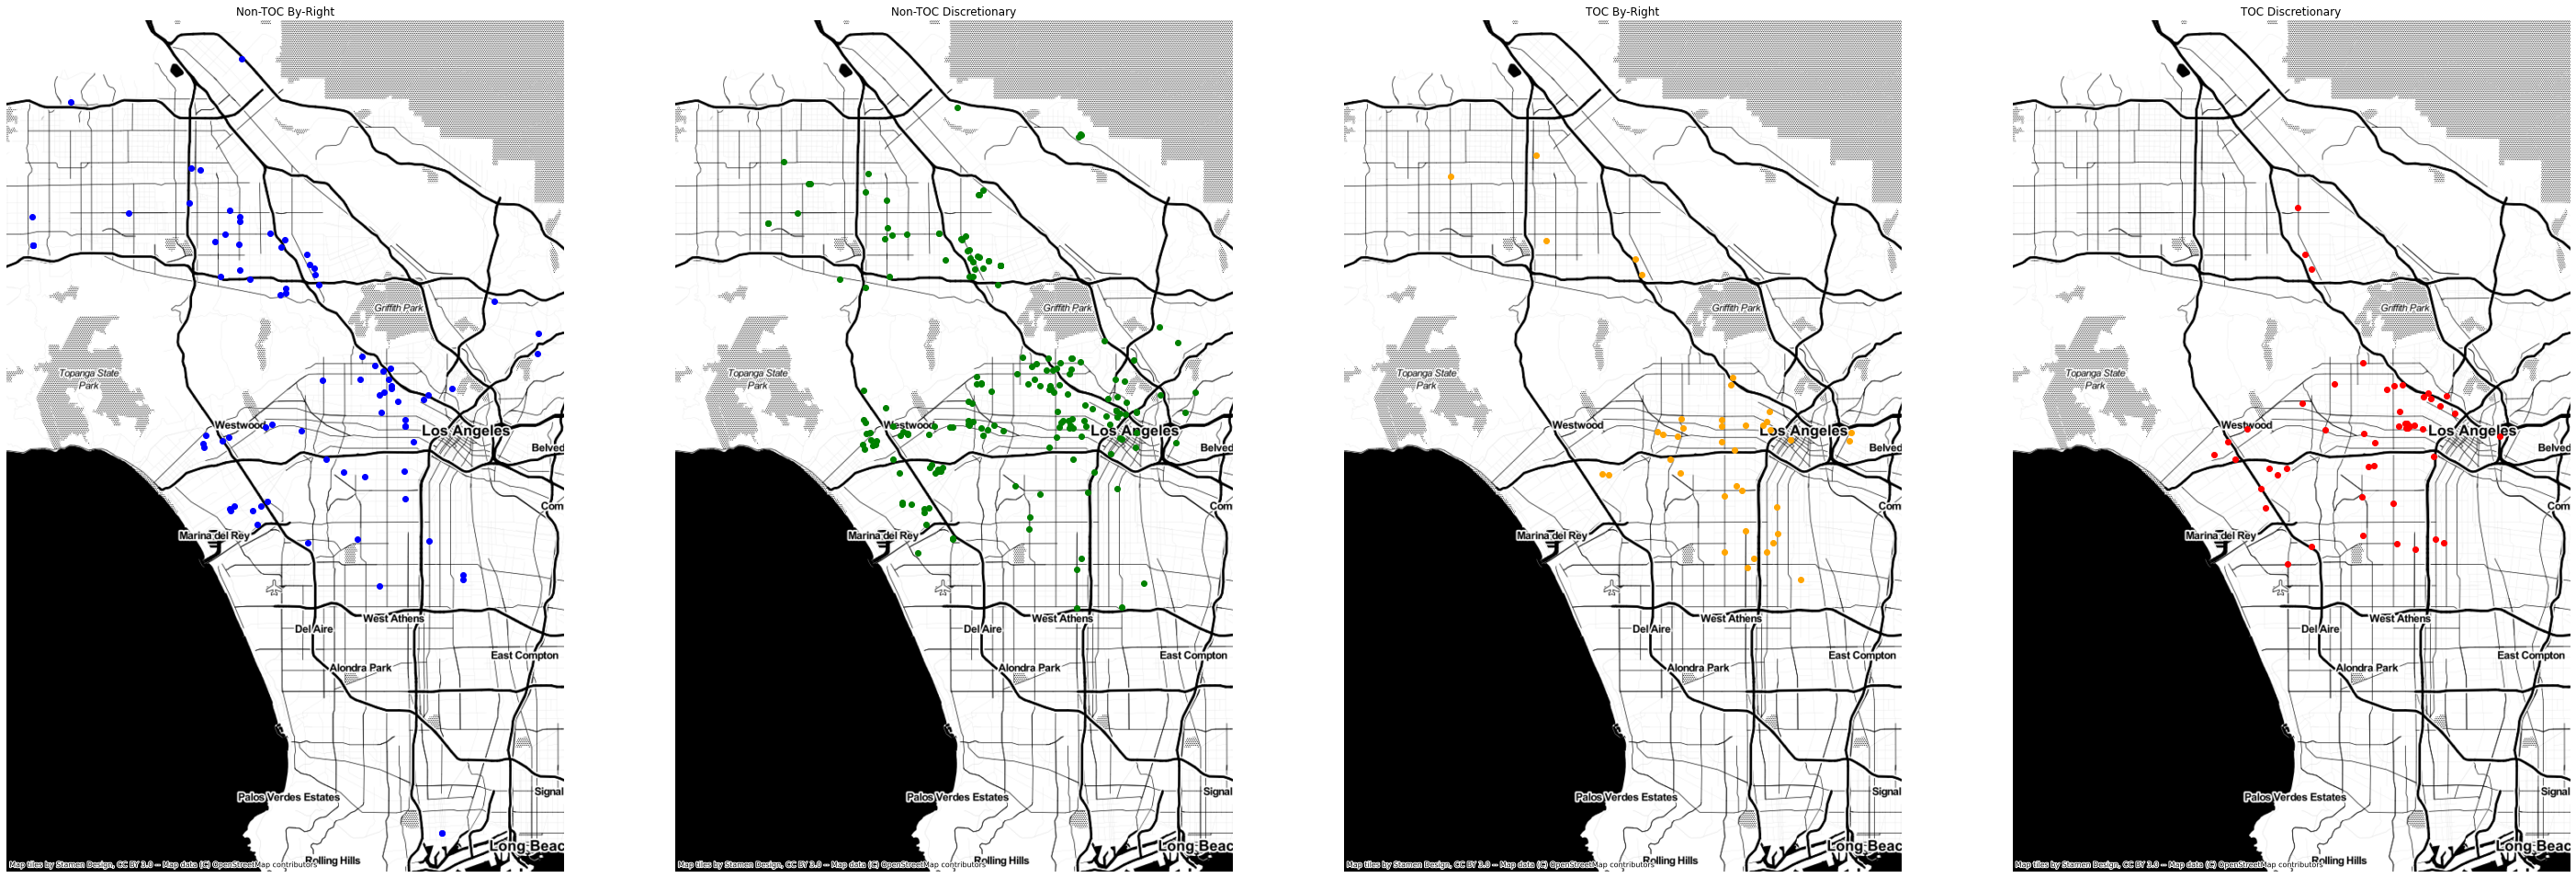

In [16]:
fix, axs = plt.subplots(1,4,sharex=True, sharey=True,figsize=(50,30))
ax1, ax2, ax3, ax4 = axs
toc_web_mercator[toc_web_mercator['TOC Status'] == 'Non-TOC BR'].plot(ax=ax1,color="blue")
ax1.set_title("Non-TOC By-Right")
ctx.add_basemap(ax1, source=ctx.providers.Stamen.Toner)
ax1.axis("off")

toc_web_mercator[toc_web_mercator['TOC Status'] == 'Non-TOC Disc'].plot(ax=ax2,color="green")
ax2.set_title("Non-TOC Discretionary")
ctx.add_basemap(ax2, source=ctx.providers.Stamen.Toner)
ax2.axis("off")

toc_web_mercator[toc_web_mercator['TOC Status'] == 'TOC BR'].plot(ax=ax3,color="orange")
ax3.set_title("TOC By-Right")
ctx.add_basemap(ax3, source=ctx.providers.Stamen.Toner)
ax3.axis("off")

toc_web_mercator[toc_web_mercator['TOC Status'] == 'TOC DISC'].plot(ax=ax4,color="red")
ax4.set_title("TOC Discretionary")
ctx.add_basemap(ax4, source=ctx.providers.Stamen.Toner)
ax4.axis("off")

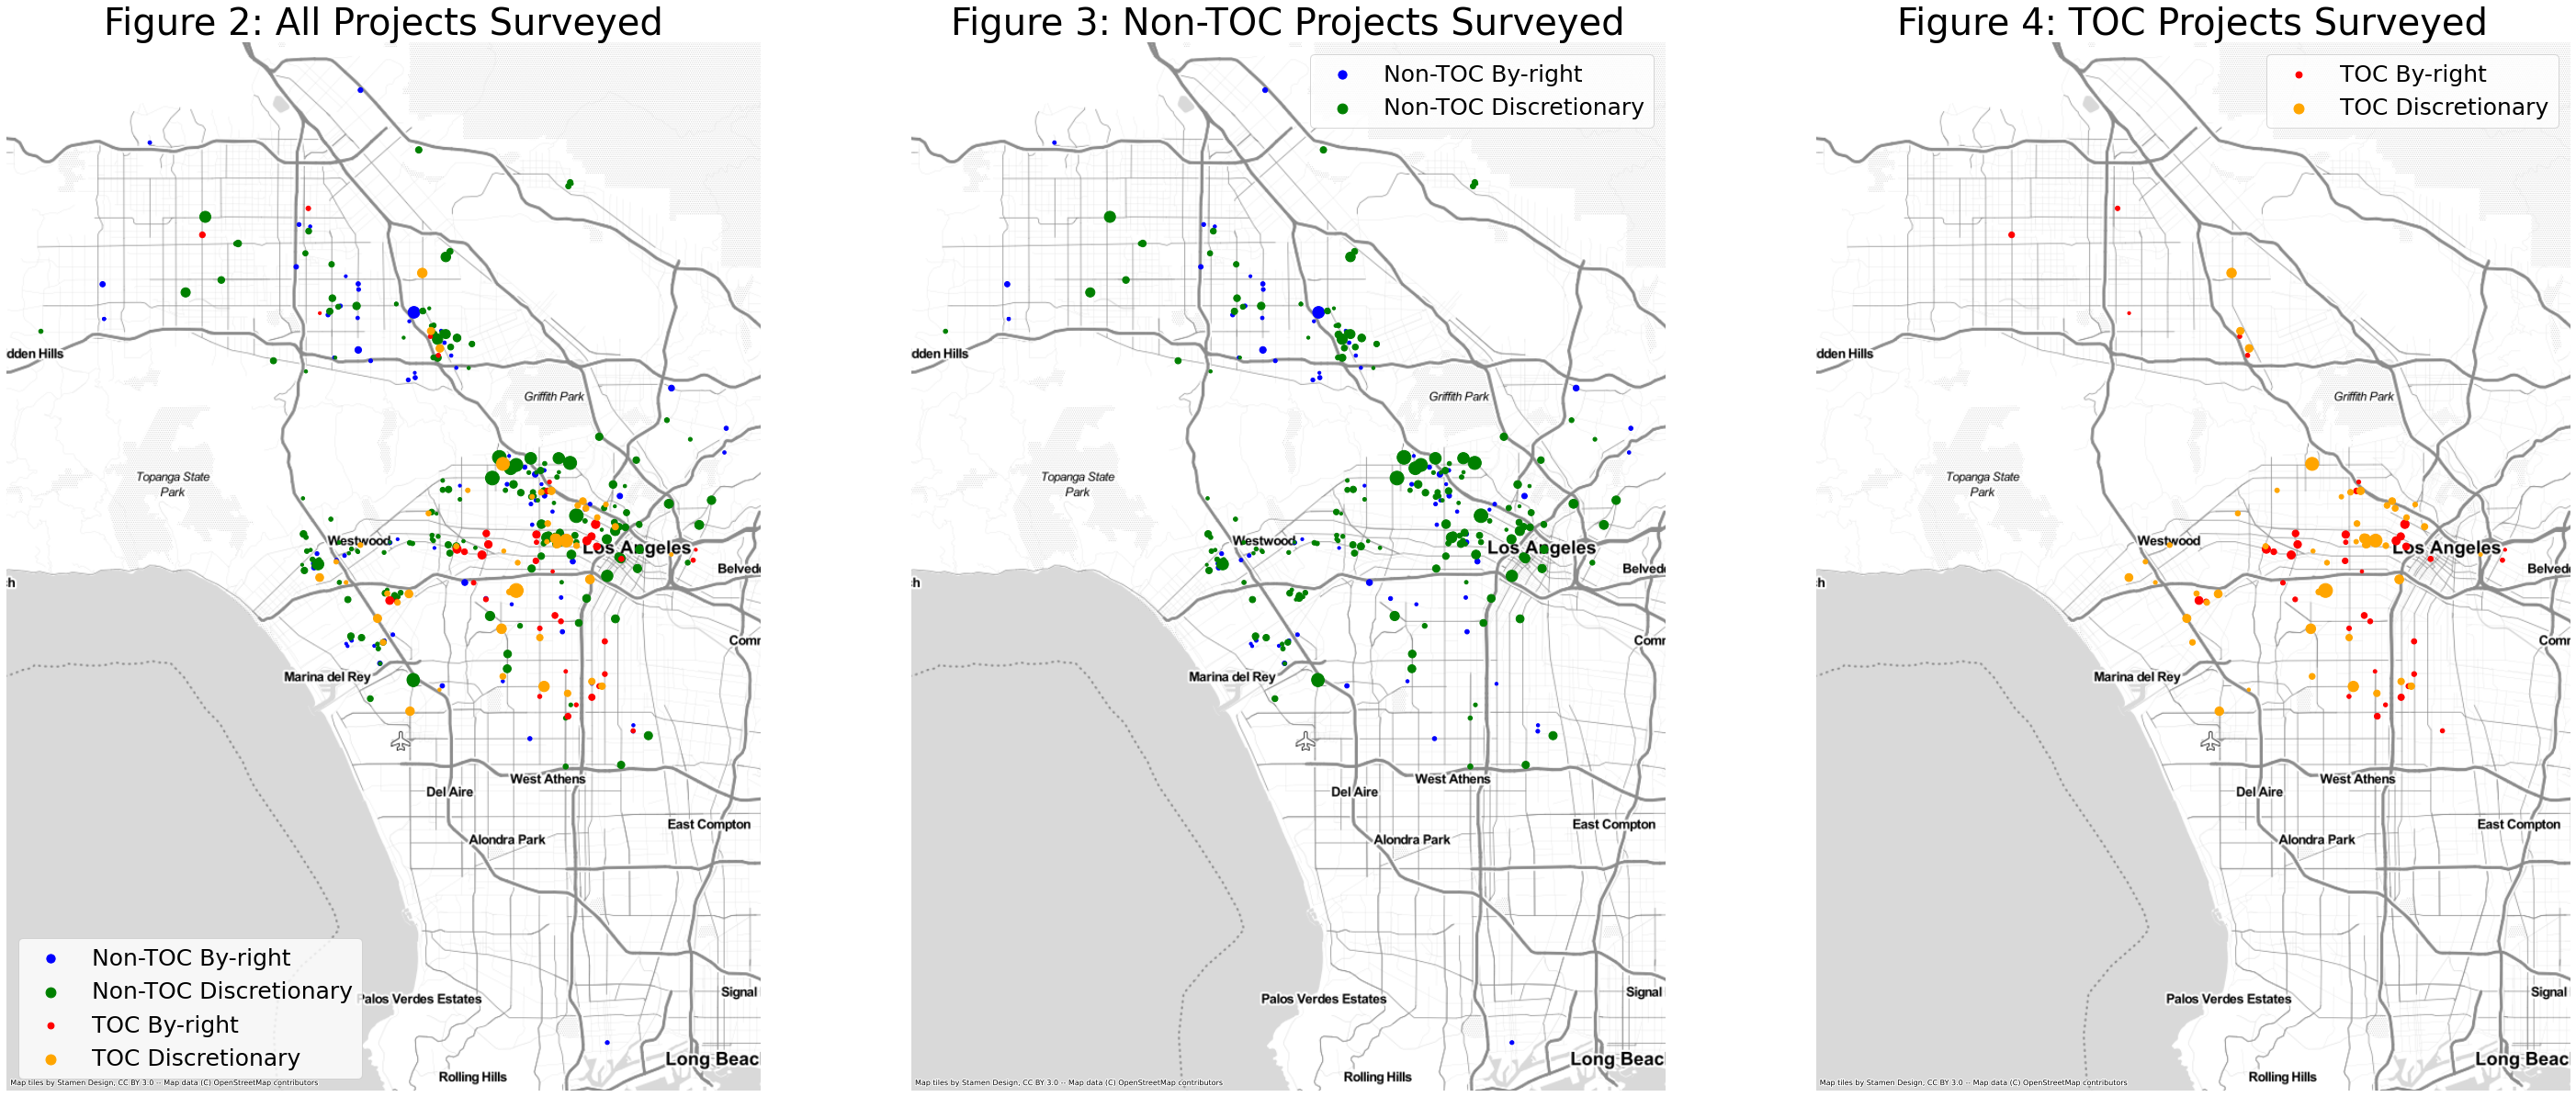

In [37]:
fix, axs = plt.subplots(1,3,sharex=True, sharey=True,figsize=(50,30))
ax1, ax2, ax3 = axs

toc_web_mercator[toc_web_mercator['TOC Status'] == 'Non-TOC BR'].plot(ax=ax1,markersize = 'total_units', color="blue")
toc_web_mercator[toc_web_mercator['TOC Status'] == 'Non-TOC Disc'].plot(ax=ax1,markersize = 'total_units',color="green")
toc_web_mercator[toc_web_mercator['TOC Status'] == 'TOC BR'].plot(ax=ax1,markersize = 'total_units', color="red")
toc_web_mercator[toc_web_mercator['TOC Status'] == 'TOC DISC'].plot(ax=ax1,markersize = 'total_units',color="orange")
ax1.set_title("Figure 2: All Projects Surveyed",fontsize=40)
ax1.legend(['Non-TOC By-right','Non-TOC Discretionary','TOC By-right','TOC Discretionary'],fontsize=25)
ctx.add_basemap(ax1, source=ctx.providers.Stamen.TonerLite)
ax1.axis("off")

toc_web_mercator[toc_web_mercator['TOC Status'] == 'Non-TOC BR'].plot(ax=ax2,markersize = 'total_units', color="blue")
toc_web_mercator[toc_web_mercator['TOC Status'] == 'Non-TOC Disc'].plot(ax=ax2,markersize = 'total_units',color="green")
ax2.set_title("Figure 3: Non-TOC Projects Surveyed",fontsize=40)
ax2.legend(['Non-TOC By-right','Non-TOC Discretionary'],fontsize=25)
ctx.add_basemap(ax2, source=ctx.providers.Stamen.TonerLite)
ax2.axis("off")

toc_web_mercator[toc_web_mercator['TOC Status'] == 'TOC BR'].plot(ax=ax3,markersize = 'total_units', color="red")
toc_web_mercator[toc_web_mercator['TOC Status'] == 'TOC DISC'].plot(ax=ax3,markersize = 'total_units',color="orange")
ax3.set_title("Figure 4: TOC Projects Surveyed",fontsize=40)
ax3.legend(['TOC By-right','TOC Discretionary'],fontsize=25)
ctx.add_basemap(ax3, source=ctx.providers.Stamen.TonerLite)
ax3.axis("off")

plt.savefig('output/fig10.png')

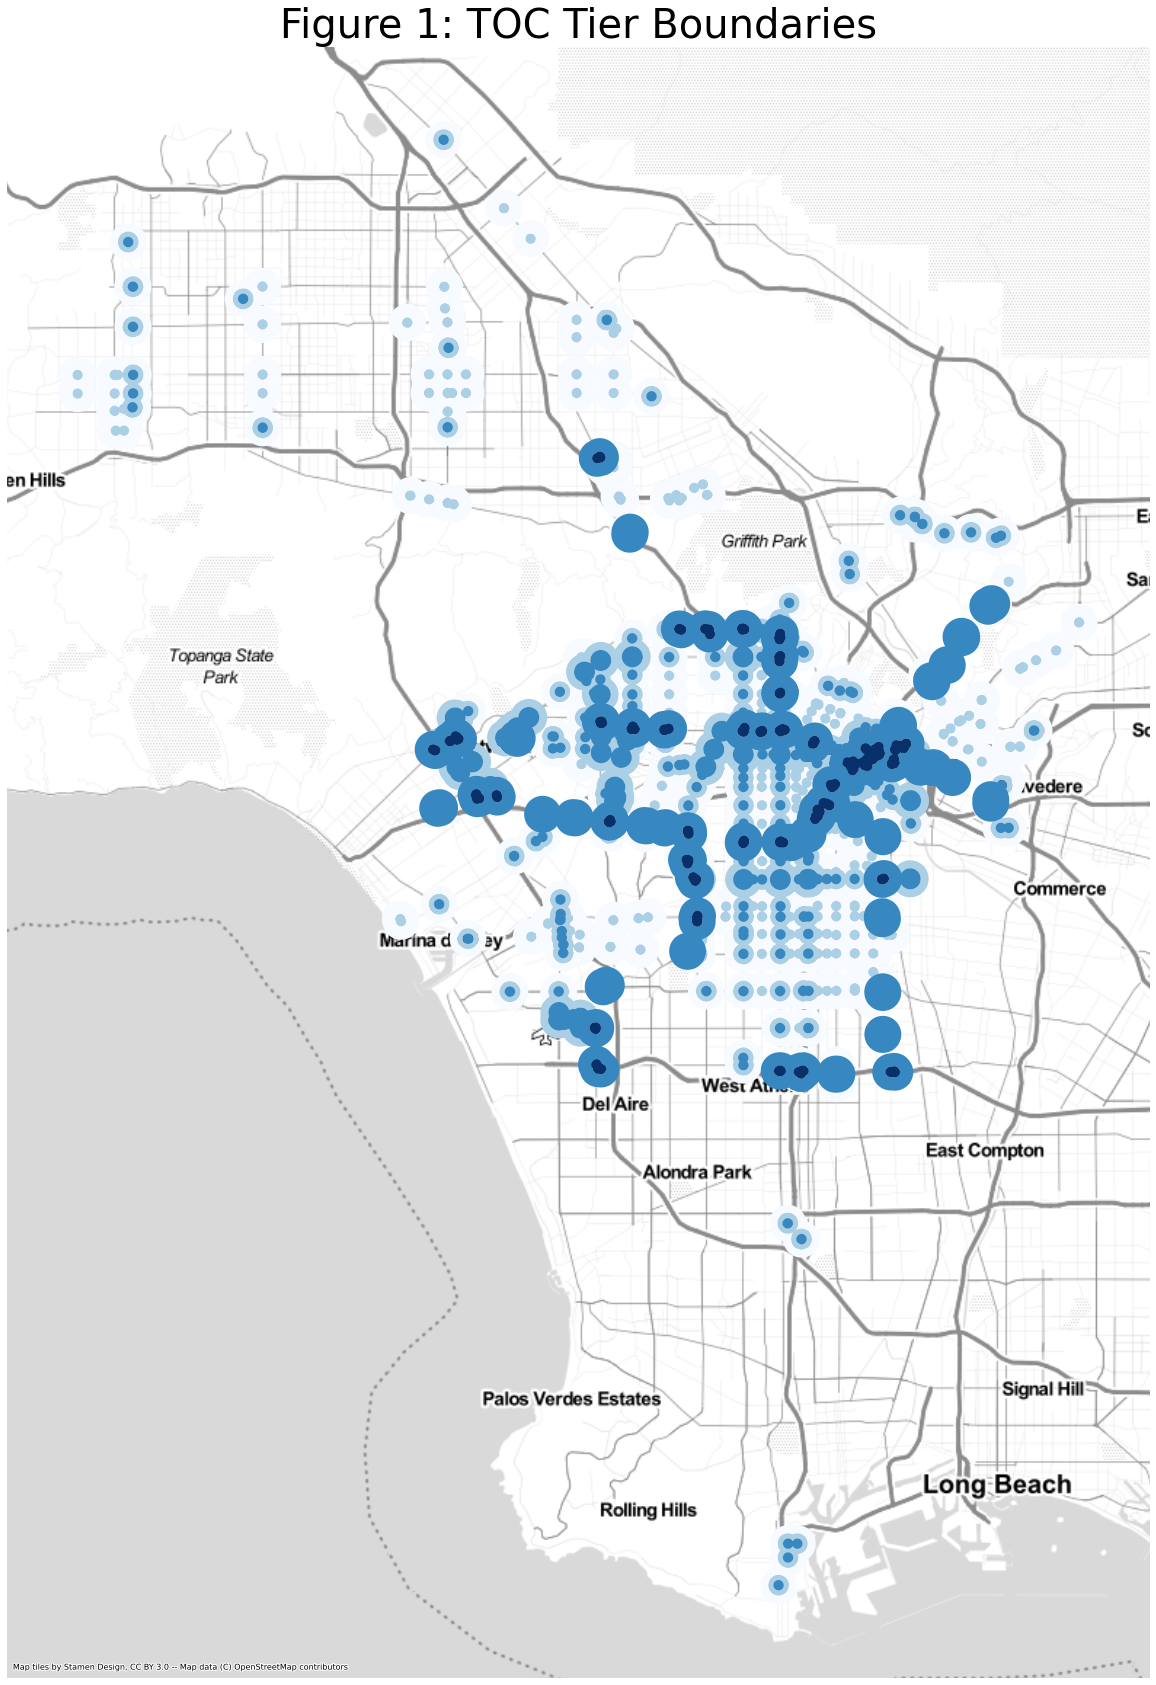

In [38]:
fig, axs = plt.subplots(1,1,figsize=(50,30))
ax1 = axs

bubbles.plot(ax=ax1,column = 'TIER', categorical = True, cmap = 'Blues')
ax1.set_title("Figure 1: TOC Tier Boundaries",fontsize=40)
ctx.add_basemap(ax1, source=ctx.providers.Stamen.TonerLite)
ax1.axis("off")
plt.savefig('output/fig11.png')